In [43]:
import pandas as pd

In [44]:
# 20220101~20221031 까지의 종로 측정소의 미세먼지 데이터
dust_data = pd.read_csv('종로미세먼지_1_10.csv', encoding = 'cp949')
dust_data.head()

,측정일자,도로변구분,측정소명,미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,20220101,일반도로,종로,24,0.021,0.025,0.5,0.003
1,20220102,일반도로,종로,22,0.025,0.020,0.4,0.003
2,20220103,일반도로,종로,22,0.012,0.023,0.5,0.003
3,20220104,일반도로,종로,20,0.021,0.014,0.4,0.003
4,20220105,일반도로,종로,20,0.026,0.015,0.4,0.002


In [45]:
# 데이터 정보
dust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일자          304 non-null    int64  
 1   도로변구분         304 non-null    object 
 2   측정소명          304 non-null    object 
 3   미세먼지(㎍/㎥)     304 non-null    int64  
 4   오존(ppm)       304 non-null    float64
 5   이산화질소농도(ppm)  304 non-null    float64
 6   일산화탄소농도(ppm)  304 non-null    float64
 7   아황산가스농도(ppm)  304 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 19.1+ KB


In [46]:
# 결측치 검사
dust_data.isnull().sum()

측정일자            0
도로변구분           0
측정소명            0
미세먼지(㎍/㎥)       0
오존(ppm)         0
이산화질소농도(ppm)    0
일산화탄소농도(ppm)    0
아황산가스농도(ppm)    0
dtype: int64

In [47]:
# 미세먼지에 대한 통계량 도출
micro_data = dust_data.loc[:, '미세먼지(㎍/㎥)']
micro_data.describe()

count    304.000000
mean      36.582237
std       20.051579
min        6.000000
25%       24.000000
50%       32.000000
75%       44.000000
max      139.000000
Name: 미세먼지(㎍/㎥), dtype: float64

In [48]:
# 20220101~20221031 까지의 서울대공원 입장객 데이터
entrance_data=pd.read_csv("서울대공원 입장객_1_10.csv", encoding='UTF-8')
entrance_data.head()

,날짜,요일,유료일계,무료일계,일합계
0,20220101,토,831,212,1043
1,20220102,일,780,304,1084
2,20220103,월,198,126,324
3,20220104,화,177,240,417
4,20220105,수,166,183,349


In [49]:
# 데이터 정보
entrance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      304 non-null    int64 
 1   요일      304 non-null    object
 2   유료일계    304 non-null    int64 
 3   무료일계    304 non-null    int64 
 4   일합계     304 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 12.0+ KB


In [50]:
# 결측치 검사
entrance_data.isnull().sum()

날짜      0
요일      0
유료일계    0
무료일계    0
일합계     0
dtype: int64

In [51]:
# 데이터 병합 과정
day_list=list(entrance_data["요일"])
dailytotal_list=list(entrance_data["일합계"])

In [52]:
dust_data["요일"]=day_list
dust_data["공원 일일 입장객"]=dailytotal_list

In [53]:
dust_data.head()

,측정일자,도로변구분,측정소명,미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),요일,공원 일일 입장객
0,20220101,일반도로,종로,24,0.021,0.025,0.5,0.003,토,1043
1,20220102,일반도로,종로,22,0.025,0.020,0.4,0.003,일,1084
2,20220103,일반도로,종로,22,0.012,0.023,0.5,0.003,월,324
3,20220104,일반도로,종로,20,0.021,0.014,0.4,0.003,화,417
4,20220105,일반도로,종로,20,0.026,0.015,0.4,0.002,수,349


In [54]:
main_data = dust_data[["측정일자", "요일", "미세먼지(㎍/㎥)", "공원 일일 입장객"]]
main_data.head()

,측정일자,요일,미세먼지(㎍/㎥),공원 일일 입장객
0,20220101,토,24,1043
1,20220102,일,22,1084
2,20220103,월,22,324
3,20220104,화,20,417
4,20220105,수,20,349


In [55]:
# 주중 데이터 분석
weekday_data = main_data[main_data['요일'].str.contains('월|화|수|목|금', na = False)]
weekday_data.head()

,측정일자,요일,미세먼지(㎍/㎥),공원 일일 입장객
2,20220103,월,22,324
3,20220104,화,20,417
4,20220105,수,20,349
5,20220106,목,13,933
6,20220107,금,19,463


In [56]:
# 통계량 도출
weekday_daily = weekday_data.loc[:, '공원 일일 입장객']
weekday_daily.describe()

count      216.000000
mean      2704.199074
std       3954.749482
min         55.000000
25%        737.500000
50%       1645.500000
75%       3481.750000
max      46381.000000
Name: 공원 일일 입장객, dtype: float64

In [57]:
# 특별한 날의 이상치(공휴일 및 기념일들 중 방문객 수가 Q3+1.5*IQR= 7598.125보다 큰 경우) 제거
weekday_pro = weekday_data.drop(index=[67, 124, 151, 156, 251, 254])

In [58]:
print('Data size: ', end = '')
print(weekday_pro.shape)

Data size: (210, 4)


In [59]:
# 회귀 분석 진행
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [60]:
# 모델 학습
weekday_model = LinearRegression()

X1 = weekday_pro['미세먼지(㎍/㎥)']
y1 = weekday_pro['공원 일일 입장객']

weekday_model.fit(X1.values.reshape(-1,1), y1)

LinearRegression()

In [61]:
# 기울기, y절편
print("coef:", weekday_model.coef_)
print("intercpt:", weekday_model.intercept_)

coef: [16.57821349]
intercpt: 1657.6393552745035


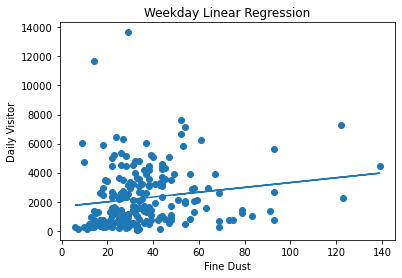

In [62]:
# 시각화
plt.title("Weekday Linear Regression")
plt.xlabel("Fine Dust")
plt.ylabel("Daily Visitor")
plt.scatter(X1, y1)
plt.plot(X1, weekday_model.coef_*X1 + weekday_model.intercept_)

In [63]:
# 주말 데이터 분석
weekend_data = main_data[main_data['요일'].str.contains('토|일', na = False)]
weekend_data.head()

,측정일자,요일,미세먼지(㎍/㎥),공원 일일 입장객
0,20220101,토,24,1043
1,20220102,일,22,1084
7,20220108,토,28,1431
8,20220109,일,28,1116
14,20220115,토,18,1433


In [64]:
# 통계량 도출
weekend_daily = weekend_data.loc[:, '공원 일일 입장객']
weekend_daily.describe()

count       88.000000
mean      9311.204545
std       7820.580316
min        504.000000
25%       1950.000000
50%       7480.000000
75%      15602.250000
max      36225.000000
Name: 공원 일일 입장객, dtype: float64

In [65]:
print('Data size: ', end = '')
print(weekend_data.shape)

Data size: (88, 4)


In [66]:
# 모델 학습
weekend_model = LinearRegression()

X2 = weekend_data['미세먼지(㎍/㎥)']
y2 = weekend_data['공원 일일 입장객']

weekend_model.fit(X2.values.reshape(-1,1), y2)

LinearRegression()

In [67]:
# 기울기, y절편
print("coef:", weekend_model.coef_)
print("intercpt:", weekend_model.intercept_)

coef: [73.37309193]
intercpt: 6595.566358987559


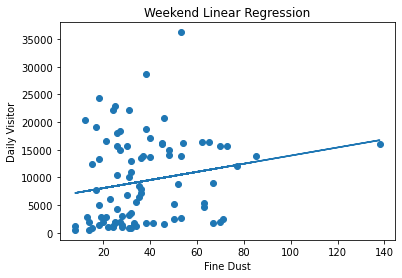

In [68]:
# 시각화
plt.title("Weekend Linear Regression")
plt.xlabel("Fine Dust")
plt.ylabel("Daily Visitor")
plt.scatter(X2, y2)
plt.plot(X2, weekend_model.coef_*X2 + weekend_model.intercept_)

In [69]:
# 새로운 기준에서의 분석을 위한 데이터프레임 재생성
n_dust_data = dust_data.copy()[["측정일자", "미세먼지(㎍/㎥)"]]
n_dust_data.head()

,측정일자,미세먼지(㎍/㎥)
0,20220101,24
1,20220102,22
2,20220103,22
3,20220104,20
4,20220105,20


In [70]:
n_day_list=list(entrance_data["요일"])
n_dailytotal_list=list(entrance_data["유료일계"])

In [71]:
n_dust_data["요일"]=n_day_list
n_dust_data["일일 유료 입장객"]=n_dailytotal_list
n_dust_data.head()

,측정일자,미세먼지(㎍/㎥),요일,일일 유료 입장객
0,20220101,24,토,831
1,20220102,22,일,780
2,20220103,22,월,198
3,20220104,20,화,177
4,20220105,20,수,166


In [72]:
# 미세먼지 수치가 80보다 큰 데이터 제거
index = n_dust_data[n_dust_data['미세먼지(㎍/㎥)'] > 80].index
n_dust_data.drop(index, inplace = True)
n_dust_data

,측정일자,미세먼지(㎍/㎥),요일,일일 유료 입장객
0,20220101,24,토,831
1,20220102,22,일,780
2,20220103,22,월,198
3,20220104,20,화,177
4,20220105,20,수,166
...,...,...,...,...
296,20221024,31,월,2138
297,20221025,44,화,1705
301,20221029,65,토,13553
302,20221030,38,일,26574


In [73]:
# 주중 주말 분리 및 위와 같은 과정 반복
n_weekday_data = n_dust_data[n_dust_data['요일'].str.contains('월|화|수|목|금', na = False)]
n_weekday_data.head()

,측정일자,미세먼지(㎍/㎥),요일,일일 유료 입장객
2,20220103,22,월,198
3,20220104,20,화,177
4,20220105,20,수,166
5,20220106,13,목,712
6,20220107,19,금,304


In [74]:
# 제거하는 공휴일 데이터의 경우 유/무료와 무관하다고 판단하여 삭제 기준은 그대로 유지함
n_weekday_pro = n_weekday_data.drop(index=[67, 124, 151, 156, 251, 254])

In [75]:
n_weekday_model = LinearRegression()

X3 = n_weekday_pro['미세먼지(㎍/㎥)']
y3 = n_weekday_pro['일일 유료 입장객']

n_weekday_model.fit(X3.values.reshape(-1,1), y3)

LinearRegression()

In [76]:
print("coef:", n_weekday_model.coef_)
print("intercpt:", n_weekday_model.intercept_)

coef: [5.97450191]
intercpt: 1255.6314138269613


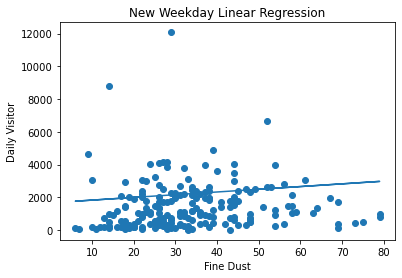

In [77]:
plt.title("New Weekday Linear Regression")
plt.xlabel("Fine Dust")
plt.ylabel("Daily Visitor")
plt.scatter(X3, y3)
plt.plot(X3, weekday_model.coef_*X3 + weekday_model.intercept_)

In [78]:
n_weekend_data = n_dust_data[n_dust_data['요일'].str.contains('토|일', na = False)]
n_weekend_data.head()

,측정일자,미세먼지(㎍/㎥),요일,일일 유료 입장객
0,20220101,24,토,831
1,20220102,22,일,780
7,20220108,28,토,1162
8,20220109,28,일,911
14,20220115,18,토,1122


In [79]:
n_weekend_model = LinearRegression()

X4 = n_weekend_data['미세먼지(㎍/㎥)']
y4 = n_weekend_data['일일 유료 입장객']

n_weekend_model.fit(X4.values.reshape(-1,1), y4)

LinearRegression()

In [80]:
print("coef:", n_weekend_model.coef_)
print("intercpt:", n_weekend_model.intercept_)

coef: [62.1773579]
intercpt: 5820.370885103486


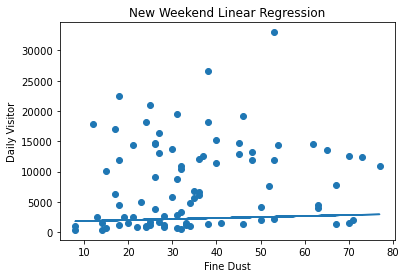

In [81]:
plt.title("New Weekend Linear Regression")
plt.xlabel("Fine Dust")
plt.ylabel("Daily Visitor")
plt.scatter(X4, y4)
plt.plot(X4, weekday_model.coef_*X4 + weekday_model.intercept_)